# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [27]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

See A1.py

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [16]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)


## define g(x)
def g(x, omega=omega):
    ## define return conditions
    lower = x < -omega      ## this will become an array with same dimensions as x, with boolean indicators for whether the condition holds
    upper = x > omega

    ## impose conditions
    x_return = x[:]            ## initiate as a copy of x
    x_return[lower] = -omega ## where lower is true, set x_return to -omega
    x_return[upper] = omega  ## where upper is true, set x_return to omega

    return x_return

    
## generate random values of x
x_vec = np.random.normal(loc=0, scale=sigma, size=N)

## evalate g over the random values of x - we can do this directly because x is a np.array
g_vec = g(x_vec)


## finally, we can take mean and variance using built-in nupmy functions
g_mean = np.mean(g_vec)
g_var = np.var(g_vec)

print(f'Mean: {g_mean : 10.3f}')
print(f'Variance: {g_var : 5.3f}')

Mean:     -0.003
Variance:  2.698


**Answer:**

See A2.py

## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

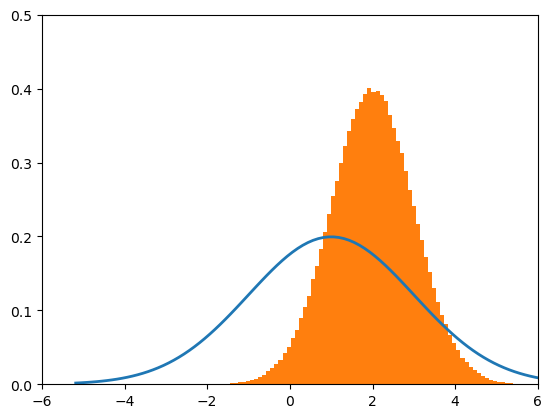

In [17]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm


# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001)
    x_high = F.ppf(0.999)
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

In [18]:
import ipywidgets as widgets

widgets.interact(fitting_normal, 
                 X = widgets.fixed(X),
                 mu_guess = widgets.FloatSlider(
                     description='$\mu$', min=0.1, max=5.0, step=0.1, value=1.0),
                 sigma_guess = widgets.FloatSlider(
                     description='$\sigma$', min=0.01, max=5.0, step=0.1, value=1.0)
                 )
            

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1), FloatSlider(value=1.0, d…

<function __main__.fitting_normal(X, mu_guess, sigma_guess)>

**Answer:**

See A3.py

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [19]:
## There are different ways to do this. Directly:
import mymodule
mymodule.myfun(n=1)
mymodule.greeting()

hello world!
have a nice day!


In [20]:
## Or we can use an alias for mymodule
import mymodule as m
m.myfun(n=1)
m.greeting()

hello world!
have a nice day!


In [21]:
## Or we can just import the functions that we want
from mymodule import myfun, greeting
myfun(n=1) ## note how we can then call the functoin without referring to the module 
greeting()

hello world!
have a nice day!


In [22]:
## Or we can just import everything from the module
from mymodule import *
myfun(n=1)
greeting() ## note how we can then call the functoin without referring to the module 

hello world!
have a nice day!


**Answer:**

See A4.py

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [23]:
from scipy import optimize

# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
np.random.seed(seed)

alpha_tilde = np.random.normal(loc=mu, scale=sigma, size=N)
alpha = np.fmax(mu_low, np.fmin(mu_high, alpha_tilde))

e1 = np.random.exponential(beta1, size=N)
e2 = np.random.exponential(beta2, size=N)

# c. demand function
def demand_good1(alpha, p1, p2, e1, e2):
    I = p1*e1+p2*e2 ## vector of income 
    x1 = alpha*I/p1 ## use that Cobb-Douglass preferences give constant income share
    return np.sum(x1)

# d. excess demand function
def excess_demand1(alpha, p1, p2, e1, e2):
    ## compute demand of x1 given the prices p1 and p2
    demand1 = demand_good1(alpha, p1, p2, e1, e2)

    ## compute supply of good 1
    supply1 = np.sum(e1)

    ## return excess demand
    return demand1-supply1

# e. find equilibrium function
def find_equilibrium(alpha, p1, p2, e1, e2): 
    """
    Find Walras equilibrium using that if market 1 clears, so does market 2

    Inputs:
    alpha : np.array, float - preference parameters
    p1: float - starting value for p1
    p2: float - price of p2 (fixed)
    e1: np.array, float - endowments of good 1
    e2: np.array, float - endowments of good 2

    Returns:
    p1: float - equilibrium price of good 1
    """

    ## we can use a built-in root finder for this!
    obj = lambda p1: excess_demand1(alpha, p1, p2, e1, e2) ## find the p1 that makes excess demand zero
    res = optimize.root(obj, p1) ## find the root of the objective function
    assert res.success ## check if the solver was successful
    return res.x[0]

# f. call find equilibrium function
find_equilibrium(alpha, 1.0, 1.0, e1, e2)

1.6205632114753963

**Hint:** The code structure is exactly the same as for the exchange economy considered in the lecture. The code for solving that exchange economy is reproduced in condensed form below.

In [24]:
# a. parameters
N = 1000
k = 2
mu_low = 0.1
mu_high = 0.9
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,k):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,k))
    
    # b. supply
    supply = k*alphas.size
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,k,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# e. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,k,kappa=kappa,eps=eps)

  0: p1 =   1.33690689 -> excess demand ->  -630.93108302
  1: p1 =   1.27551407 -> excess demand ->  -613.92820358
  2: p1 =   1.21593719 -> excess demand ->  -595.76882769
  3: p1 =   1.15829785 -> excess demand ->  -576.39340748
  4: p1 =   1.10272273 -> excess demand ->  -555.75114178
   ...
 25: p1 =   0.53269252 -> excess demand ->   -53.80455643
 50: p1 =   0.50897770 -> excess demand ->    -0.27125769
 75: p1 =   0.50886603 -> excess demand ->    -0.00120613
100: p1 =   0.50886553 -> excess demand ->    -0.00000536
125: p1 =   0.50886553 -> excess demand ->    -0.00000002
130: p1 =   0.50886553 -> excess demand ->    -0.00000001


**Answers:**

See A5.py

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [25]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = np.zeros((5,8)) ## you can put whatever you want in here

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.random.uniform(size=(5,8)) ## ..and here as well

# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# d. save with numpy
np.savez(f'data.npz', **my_np_data)
    
# a. try
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
try:
    load_all()
except:
    print('failed')

variables loaded without error


**Answer:**

See A6.py

# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [26]:
# a. choose parameters
N = 10000
J = 3

# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower
print(Sigma)

# c. draw random numbers
np.random.seed(2024) ## don't forget to set seed!

alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
print(np.mean(alphas,axis=0))
print(np.corrcoef(alphas.T))

es = np.random.exponential([1,2,3], size=(N,J)) ## endowment: exponential distribution with means [1,2,3]

def demand_func(alpha, p, e):
    I = (e@p_vec).reshape(-1,1) ## vector of income - note the use of matrix product to compute income for each individual
                                ## .reshape(-1,1) is used to ensure that I is a column vector
    inc_shares = alpha/alpha.sum(axis=1).reshape(-1,1) ## compute income shares
    return (inc_shares*I/p).sum(axis=0)

def excess_demand_func(alpha, p, e):
    ## compute demand of x1 given the prices p1 and p2
    demand = demand_func(alpha, p, e)

    ## compute supply of good 1
    supply = np.sum(e, axis=0)

    ## return excess demand
    return demand-supply

p_vec = np.ones(J)


def find_equilibrium(alpha, p, e):
    obj = lambda p: excess_demand_func(alpha, np.append(p,1.0), e)[:-1] ## objective function is only a function of J-1 prices, keeping pJ=1. So the objective function takes as input p1 and p2 and returns excess demand i nmarket 1 and market 2.
    res = optimize.root(obj, p[:-1]) ## find the root of the objective function
    assert res.success ## check if the solver was successful
    return np.append(res.x,1.0) ## return the equilibrium price vector - include the price for good J as well

p_eq = find_equilibrium(alphas, p_vec, es)
print(f'\nequilibrium with {J} goods: {p_eq}')



## check that this works with even more goods
J = 6
Sigma_lower = np.array([[1,       0,   0, 0, 0, 0], 
                        [0.5,     1,   0, 0, 0, 0], 
                        [0.25, -0.5,   1, 0, 0, 0],
                        [0.25, -0.5, 0.5, 1, 0, 0],
                        [0.25, -0.5, 0.5, 1, 1, 0],
                        [0.25, -0.5, 0.5, 1, 1, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower

# draw random numbers
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
es = np.random.exponential(1, size=(N,J)) ## endowment: exponential distribution with mean 1

p_vec = np.ones(J)
p_eq = find_equilibrium(alphas, p_vec, es)
print(f'\nequilibrium with {J} goods: {p_eq}')



[[ 1.3125  0.375   0.25  ]
 [ 0.375   1.25   -0.5   ]
 [ 0.25   -0.5     1.    ]]
[1.89381671 1.8689103  1.65111423]
[[ 1.          0.16700177  0.14567472]
 [ 0.16700177  1.         -0.21090731]
 [ 0.14567472 -0.21090731  1.        ]]

equilibrium with 3 goods: [1.84483007 1.02641935 1.        ]

equilibrium with 6 goods: [0.90498206 1.4671274  0.93318024 1.05094418 0.86109189 1.        ]
